In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
import matplotlib.pyplot as plt

In [15]:
## Reading the datasets and preprocessing

import chardet

with open('movies.dat', 'rb') as f:
    result = chardet.detect(f.read())

df_movie=pd.read_csv('movies.dat',sep = '::', engine='python', encoding=result['encoding'])

In [16]:
df_movie.columns=['MovieIDs','MovieName','Category']
df_movie.dropna(inplace=True)
df_movie.head()

,MovieIDs,MovieName,Category
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [17]:
with open('ratings.dat', 'rb') as f:
    result = chardet.detect(f.read())

df_ratings=pd.read_csv('ratings.dat',sep = '::', engine='python', encoding=result['encoding'])

In [18]:
df_ratings.columns=['ID','MovieID','Ratings','TimeStamp']
df_ratings.dropna(inplace=True)
df_ratings.head()

,ID,MovieID,Ratings,TimeStamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [19]:
with open('users.dat', 'rb') as f:
    result = chardet.detect(f.read())

df_users=pd.read_csv('users.dat',sep = '::', engine='python', encoding=result['encoding'])

In [20]:
df_users.columns=['UserID','Gender','Age','Occupation','Zip-code']
df_users.dropna(inplace=True)
df_users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [24]:
df=pd.concat([df_movie,df_ratings,df_users],axis=1)
df.head()

,MovieIDs,MovieName,Category,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,M,56.0,16.0,70072
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,M,25.0,15.0,55117
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,M,45.0,7.0,02460
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,M,25.0,20.0,55455
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,F,50.0,9.0,55117


In [25]:
## Data Visualisation

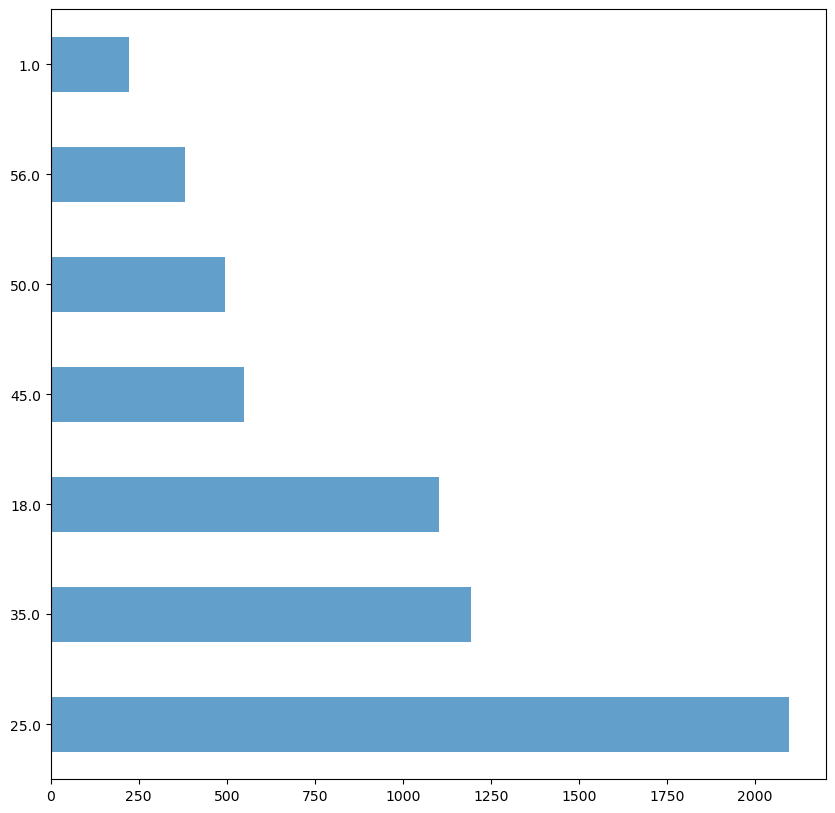

In [26]:
df['Age'].value_counts().plot(kind='barh',alpha=0.7,figsize=(10,10))
plt.show()

In [27]:
## Concatenating all the three parts to get a whole dataset

df=pd.concat([df_movie,df_ratings,df_users],axis=1)
df.head()

,MovieIDs,MovieName,Category,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,M,56.0,16.0,70072
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,M,25.0,15.0,55117
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,M,45.0,7.0,02460
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,M,25.0,20.0,55455
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,F,50.0,9.0,55117


Text(0.5, 0, 'Age')

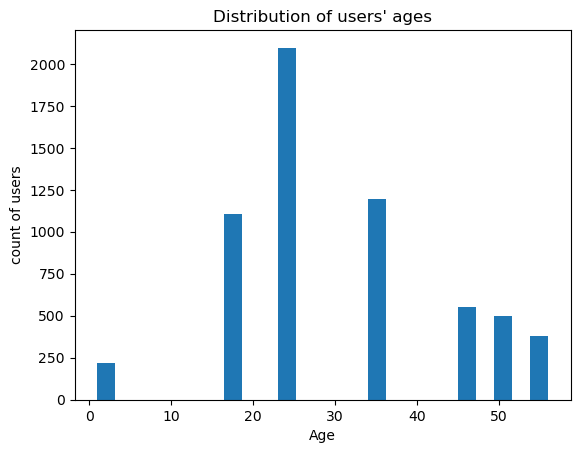

In [28]:
df.Age.plot.hist(bins=25)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('Age')

In [29]:
## Building machine learning model

In [36]:
data=df[500:]
data.dropna(inplace=True)


C:\Users\mahen\AppData\Local\Temp\ipykernel_17132\2587901590.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [79]:
features = data[['MovieID','Age','Occupation']].values
labels=data[['Ratings']].values

In [80]:
#Scaling the data:

from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [82]:
x=pd.DataFrame(scale.fit_transform(features),columns=features.columns)
x.head

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [39]:
x_train, x_test, y_train, y_test = train_test_split(features,labels,test_size=0.33,random_state=42)

In [43]:
#Logistic Regression

model_log=LogisticRegression()
model_log.fit(x_train,y_train)
y_pred=model_log.predict(x_test)

C:\Users\mahen\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
acc1=model_log.score(x_train,y_train)
acc1

0.3275938189845475

In [47]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)
Y_pred = model_dt.predict(x_test)
acc2 = model_dt.score(x_train, y_train)
acc2

0.9854304635761589

In [48]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(x_train, y_train)
Y_pred = model_rf.predict(x_test)
model_rf.score(x_train, y_train)
acc3 = model_rf.score(x_train, y_train)
acc3

C:\Users\mahen\AppData\Local\Temp\ipykernel_17132\4129980744.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(x_train, y_train)


0.9854304635761589

In [53]:
#Linear Regression

model_lin=LinearRegression()
model_lin.fit(x_train,y_train)
y_pred=model_lin.predict(x_test)
acc4 = model_lin.score(x_train, y_train)
acc4

0.006180816544167578

In [66]:
print("Model\t\t\tScore")
print("---------------------------------------------")
print("Logistic Regression\t"+str(acc1))
print("\nDecision Tree\t\t"+str(acc2))
print("\nRandom Forest\t\t"+str(acc3))
print("\nLinear Regression\t"+str(acc4))

Model			Score
---------------------------------------------
Logistic Regression	0.3275938189845475

Decision Tree		0.9854304635761589

Random Forest		0.9854304635761589

Linear Regression	0.006180816544167578


In [70]:
## Chosen Decision Tree

model_dt.predict(2,661,16)

TypeError: predict() takes from 2 to 3 positional arguments but 4 were given